<a href="https://colab.research.google.com/github/Borg2/Binary-Classification-of-Heart-Disease-using-a-Multi-Layer-Perceptron/blob/main/Heart_Disease_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Importing the relevant libraries**




In [119]:

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Input
import keras.optimizers as optimizers
from keras.initializers import HeNormal
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

**Reading the file and checking for NULL values**

In [118]:
df=pd.read_excel('/content/heart_disease_health_indicators - heart_disease_health_indicators.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

**Standardizing the data**

In [120]:
x=df.drop('HeartDiseaseorAttack',axis=1)
y=df['HeartDiseaseorAttack']
scaler = StandardScaler()
x = scaler.fit_transform(x)

**Splitting the data to test and train**

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape

(202928, 21)

**Building the model architecture**

In [106]:
model = Sequential()
model.add(Input(shape=(21,)))
model.add(Dense(128, activation='sigmoid',kernel_initializer=HeNormal()))
model.add(Dense(64, activation='sigmoid' ,kernel_initializer=HeNormal()))
model.add(Dense(32, activation='sigmoid' ,kernel_initializer=HeNormal()))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                     │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

**Initializing the model and training it**

In [109]:
optimizer = optimizers.Adam(learning_rate=0.001,clipvalue=1.0)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

model.fit(x_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9093 - loss: 0.2322
Epoch 2/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9101 - loss: 0.2316
Epoch 3/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9102 - loss: 0.2294
Epoch 4/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9116 - loss: 0.2278
Epoch 5/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9109 - loss: 0.2287
Epoch 6/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9110 - loss: 0.2296
Epoch 7/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9095 - loss: 0.2296
Epoch 8/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9102 - loss: 0.2302
Epoch 9/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9103 - loss: 0.2281
Epoch 10/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9104 - loss: 0.2280
Epoch 11/30
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9106 - loss: 0.2273
Epoch 12/30
6342/63

**Evaluating the models accuracy and loss**

In [110]:
loss,accuracy=model.evaluate(x_test,y_test)
print("Loss:",loss)
print("Accuracy:%6.4f"% (accuracy*100))

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9045 - loss: 0.2565
Loss: 0.2546502649784088
Accuracy:90.5072


**Calculating the confusion matrix, f1-score, recall and precision

In [115]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)

confusion_mat = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Confusion Matrix:
[[45344   607]
 [ 4209   573]]
Precision: 0.48559322033898306
Recall: 0.11982434127979925
F1-Score: 0.19221737671922173


**Calculating the ROC_AUC score and plotting the ROC curve**

ROC-AUC Score: 0.5533073089393926


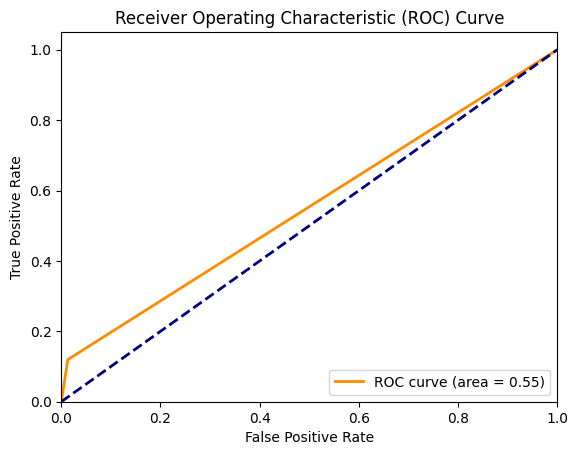

In [117]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Print the ROC-AUC score
print("ROC-AUC Score:", roc_auc)

# Optionally, plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()